# SUMMARY OF THE EXAMPLE RUN

The purpose of this script is to show what the example run does. This script has 2 main sections:
 - What inputs are used
 - What the run shows

In [88]:
import pandas as pd
from ImportData import import_SWEiopa
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## What inputs are used
The OSEM model uses two portfolios. The first one with a small portfolio of equities and the second one with a small portfolio of corporate bonds.

In [89]:
path_param = "Input\\parameters.csv"

param = pd.read_csv(path_param,index_col=0)

In [90]:
display(param)

,Value
Parameter,
EIOPA_param_file,Input/Param_no_VA.csv
EIOPA_curves_file,Input/Curves_no_VA.csv
country,Slovenia
run_type,Risk Neutral
n_proj_years,50
Precision,1E-10
Tau,0.0001
compounding,-1
Modelling_Date,29/04/2023


### Initial liquidity

In [91]:
path_cash = "Input\\Cash_Portfolio_test.csv"
cash = pd.read_csv(path_cash,index_col=0)

In [92]:
display(cash)

,Bank_Account
Asset_ID,
1,10000


### Portfolio of equity shares

In [93]:
path_equity = "Input\\Equity_Portfolio_test.csv"
equity = pd.read_csv(path_equity,index_col=0)

In [94]:
display(equity)

,Asset_Type,NACE,Issue_Date,Dividend_Yield,Frequency,Units,Market_Price,Terminal,Default_Probability,Growth_Rate
Asset_ID,,,,,,,,,,
1125,Equity_Share,A1.4.5,3/12/2021,0.03,1,1,94,1,0.03,0.01
2123,Equity_Share,B5.2.0,3/12/2021,0.05,1,1,92,1,0.03,0.02
3232,Equity_Share,B8.9.3,3/12/2019,0.04,1,1,96,1,0.03,0.04
3237,Equity_Share,B8.9.3,3/12/2019,0.04,1,1,96,1,0.03,0.00


## Portfolio of corporate bonds

In [95]:
path_bonds = "Input\\Bond_Portfolio_test.csv"
bonds = pd.read_csv(path_bonds,index_col=0)

In [96]:
display(bonds)

,Asset_Type,NACE,Issue_Date,Maturity_Date,Notional_Amount,Coupon_Rate,Z_Spread,Frequency,Recovery_Rate,Default_Probability,Units,Market_Price
Asset_ID,,,,,,,,,,,,
1234,Corporate_Bond,A1.4.5,3/12/2021,12/12/2026,100,0.03,0.01,1,0.4,0.03,1,94
2889,Corporate_Bond,B5.2.0,3/12/2021,12/12/2028,100,0.05,0.01,2,0.4,0.03,2,92
31,Corporate_Bond,B8.9.3,3/12/2019,3/12/2025,100,0.04,0.01,12,0.4,0.03,3,96


### Commitments (Outflows)

In [97]:
path_liability = "Input\\Liability_Cashflow.csv"
liability = pd.read_csv(path_liability, index_col=0)

In [98]:
display(liability)

,Liability_Size
Liability_Date,
1/9/2023,6
2/10/2023,92
2/11/2023,93
3/12/2023,2
3/1/2024,7
...,...
19/3/2049,14
19/4/2049,28
20/5/2049,53


### Economic environment

In [99]:
[maturities_country, curve_country, extra_param, Qb] =  import_SWEiopa(param.loc["EIOPA_param_file"][0],
                    param.loc["EIOPA_curves_file"][0], param.loc["country"][0])

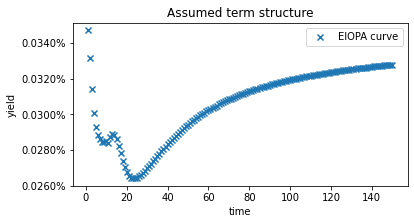

In [100]:
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(curve_country.index, curve_country.values, label="EIOPA curve", marker="x")
ax1.set_ylabel("yield")
ax1.set_title('Assumed term structure')
ax1.set_xlabel("time")
ax1.legend()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.set_figwidth(6)
fig.set_figheight(3)
plt.show()

## What the run shows

In [101]:
path_summary = "Output\\Results.csv"
summary = pd.read_csv(path_summary,index_col=0)

In [102]:
display(summary)

,Start cash,End cash,Start market value,After growth market value,End market value,Portfolio return,Dividend cash flow,Coupon cash flow,Terminal cash flow,Notional cash flow,Liability cash flow
2023-04-29,NaN,1.000000e+04,NaN,NaN,944.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-28,1.000000e+04,0.000000e+00,944.000000,1131.647758,11094.910085,0.198779,15.262327,167.000000,0.000000,0.000000,-219.0
2025-04-28,0.000000e+00,-6.821210e-13,11094.910085,11257.140153,12979.814124,0.014622,152.371222,1637.302749,0.000000,0.000000,-67.0
2026-04-28,-6.821210e-13,0.000000e+00,12979.814124,13090.969540,17276.502093,0.008564,178.930021,1345.240337,0.000000,3391.362195,-730.0
2027-04-28,0.000000e+00,-5.911716e-12,17276.502093,17395.189415,18978.761104,0.006870,240.546475,343.134796,0.000000,1491.890418,-492.0
2028-04-27,-5.911716e-12,-1.136868e-12,18978.761104,19090.621750,18958.562891,0.005894,267.400197,325.540943,0.000000,0.000000,-725.0
2029-04-27,-1.136868e-12,-9.094947e-13,18958.562891,19072.185893,22132.001591,0.005993,270.636452,323.289022,0.000000,3232.890224,-767.0
2030-04-27,-9.094947e-13,-1.136868e-13,22132.001591,22263.127554,21957.250051,0.005925,320.122497,0.000000,0.000000,0.000000,-626.0
2031-04-27,-1.136868e-13,-1.023182e-12,21957.250051,22088.246116,21861.138535,0.005966,321.892419,0.000000,0.000000,0.000000,-549.0
2032-04-26,-1.023182e-12,-6.821210e-13,21861.138535,22003.641584,21805.518160,0.006519,324.876576,0.000000,0.000000,0.000000,-523.0


### Return of the entire portfolio

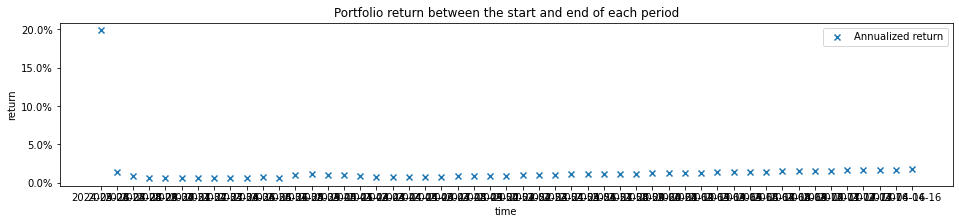

In [103]:
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(summary["Portfolio return"].index[1:], summary["Portfolio return"].values[1:]*100, label="Annualized return", marker="x")
ax1.set_ylabel("return")
ax1.set_title('Portfolio return between the start and end of each period')
ax1.set_xlabel("time")
ax1.legend()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.set_figwidth(16)
fig.set_figheight(3)
plt.show()

Total market value of the portfolio

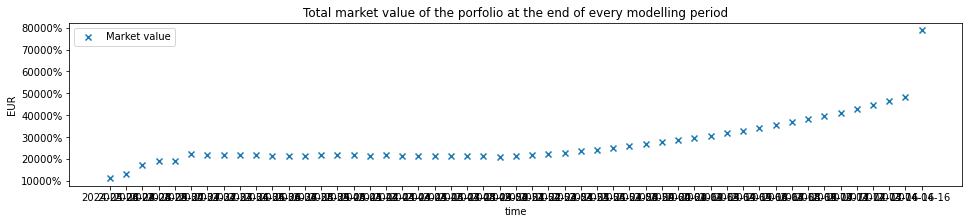

In [104]:
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(summary["End market value"].index[1:], summary["End market value"].values[1:], label="Market value", marker="x")
ax1.set_ylabel("EUR")
ax1.set_title('Total market value of the porfolio at the end of every modelling period')
ax1.set_xlabel("time")
ax1.legend()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.set_figwidth(16)
fig.set_figheight(3)
plt.show()

### Corporate bond flows

When bond expire they return their notional amount:

In [105]:
notionals = summary["Notional cash flow"][1:]
notionals = notionals[notionals>0]

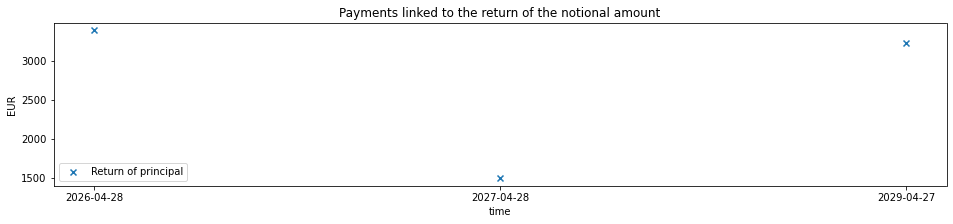

In [106]:
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(notionals.index, notionals.values, label="Return of principal", marker="x")
ax1.set_ylabel("EUR")
ax1.set_title('Payments linked to the return of the notional amount')
ax1.set_xlabel("time")
ax1.legend()
fig.set_figwidth(16)
fig.set_figheight(3)
plt.show()

Before expiration, they pay out regular coupon payments:

In [107]:
coupons = summary["Coupon cash flow"][1:]
coupons = coupons[coupons>0]

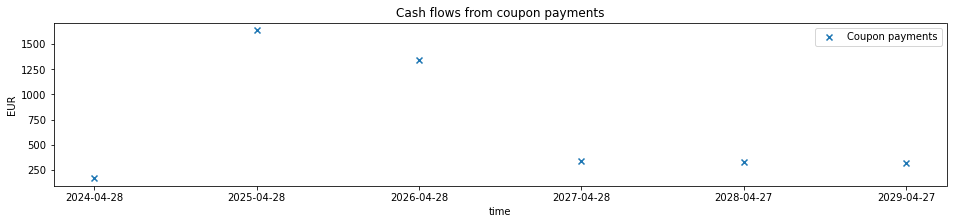

In [108]:
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(coupons.index, coupons.values, label="Coupon payments", marker="x")
ax1.set_ylabel("EUR")
ax1.set_title('Cash flows from coupon payments')
ax1.set_xlabel("time")
ax1.legend()
fig.set_figwidth(16)
fig.set_figheight(3)
plt.show()

### Equity flows

Entire equity portfolio is sold at the end of the period in OSEM:

In [109]:
terminal = summary["Terminal cash flow"][1:]
terminal = terminal[terminal>0]

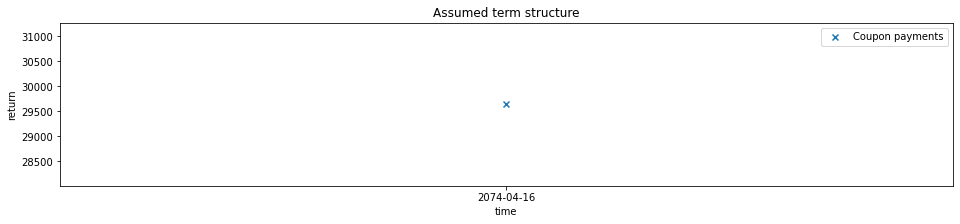

In [110]:
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(terminal.index, terminal.values, label="Coupon payments", marker="x")
ax1.set_ylabel("return")
ax1.set_title('Assumed term structure')
ax1.set_xlabel("time")
ax1.legend()
fig.set_figwidth(16)
fig.set_figheight(3)
plt.show()

Each equity can pay regular dividends as % of their market value:

In [111]:
dividends = summary["Dividend cash flow"][1:]
dividends = dividends[dividends>0]

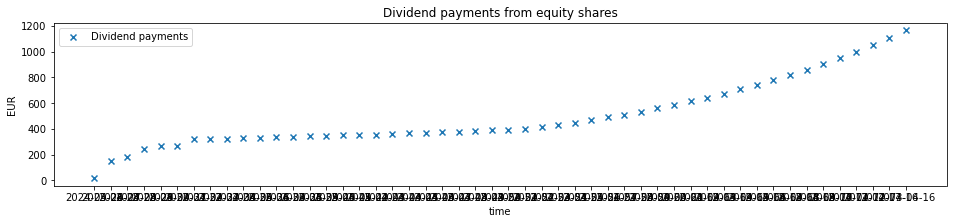

In [112]:
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(dividends.index, dividends.values, label="Dividend payments", marker="x")
ax1.set_ylabel("EUR")
ax1.set_title('Dividend payments from equity shares')
ax1.set_xlabel("time")
ax1.legend()
fig.set_figwidth(16)
fig.set_figheight(3)
plt.show()

### Cash account

In [113]:
cash = summary["End cash"]

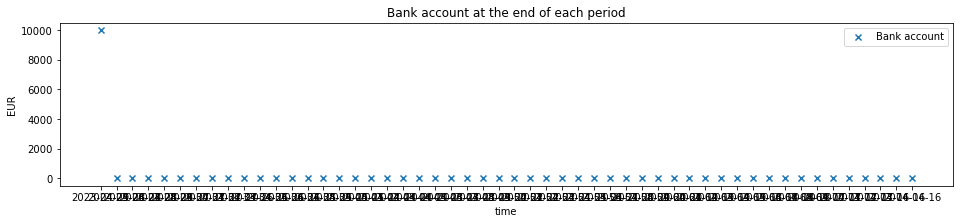

In [114]:
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(cash.index, cash.values, label="Bank account", marker="x")
ax1.set_ylabel("EUR")
ax1.set_title('Bank account at the end of each period')
ax1.set_xlabel("time")
ax1.legend()
fig.set_figwidth(16)
fig.set_figheight(3)
plt.show()

### Liability cash flows

The company has future commitments (liabilities) that needs to honor:

In [115]:
liability_cf = summary["Liability cash flow"][1:]
liability_cf = liability_cf[liability_cf<0]

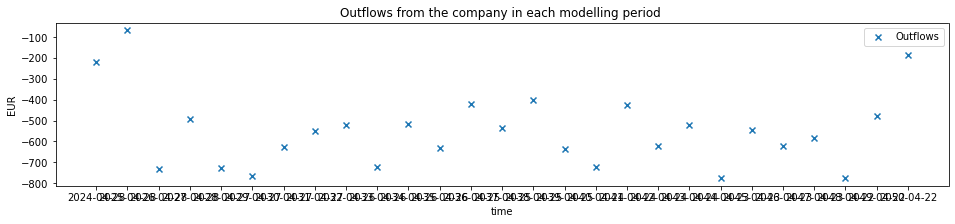

In [116]:
fig, ax1 = plt.subplots(1, 1)
ax1.scatter(liability_cf.index, liability_cf.values, label="Outflows", marker="x")
ax1.set_ylabel("EUR")
ax1.set_title('Outflows from the company in each modelling period ')
ax1.set_xlabel("time")
ax1.legend()
fig.set_figwidth(16)
fig.set_figheight(3)
plt.show()